# Using Tensorflow 2 framework, running ML(ANN) model for FBG spectrum for                            Normal, Phase Shifted and Chirped case.

Import all required module dependencies:-

In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
#from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from torchvision import transforms
import keras
import keras.backend as kb
import tensorflow as tf
from keras.models import Sequential

Using TensorFlow backend.


Using MinMaxScaler, we transform all the I/O pairs in the range: (0,1). This is to employ the data into the model

In [2]:
scaler1 = MinMaxScaler()  
scaler2 = MinMaxScaler()


In [3]:
no_of_output_nodes = 3 # No. of output units (No. of output optical parameters)

In [4]:
df1 = pd.read_excel('data/PS_data.xlsx',engine='openpyxl')
df1.drop(df1.columns[df1.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
df1.dropna(axis='columns',how='all',inplace=True)
print(df1.head()) # To print 5(default is 5 , if you want to see more we can give arguement inside (..) of head) rows of the dataframe(Data in the above mentioned Excel file) 

df2 = pd.read_excel('data/NS_data.xlsx',engine='openpyxl')
df2.drop(df2.columns[df2.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
df2.dropna(axis='columns',how='all',inplace=True)
print(df2.head())

df3 = pd.read_excel('data/chirp_data.xlsx',engine='openpyxl')
df3.drop(df3.columns[df3.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
df3.dropna(axis='columns',how='all',inplace=True)
print(df3.head())

           WL  Reflection
0  1549.85000    0.000142
1  1549.85003    0.000132
2  1549.85006    0.000122
3  1549.85009    0.000113
4  1549.85012    0.000104
           WL  Reflection
0  1549.85000    0.000028
1  1549.85003    0.000020
2  1549.85006    0.000013
3  1549.85009    0.000007
4  1549.85012    0.000004
          WL  Reflection
0  1549.0000    0.000456
1  1549.0002    0.000435
2  1549.0004    0.000415
3  1549.0006    0.000395
4  1549.0008    0.000374


Input Data values is in terms of 'nm' below.

In [5]:
datafile_1= df1.values
datafile_2= df2.values
datafile_3= df3.values

datafile_1_nm = datafile_1.reshape(10000,2) #Phase Shifted FBG
datafile_2_nm = datafile_2.reshape(10000,2) # Normal FBG
datafile_3_nm = datafile_3.reshape(10000,2) # Chirped FBG

 

datafile_input_nm = np.vstack([datafile_2_nm[:,0],datafile_3_nm[:,0]]).T 


Above, both datafile_1_nm and data_file_2_nm has same wavelenght range (1549.85- 1550.14997 nm) so hence instead of 3 inputs
to our network we will use 2 inputs(2 columns of "variable datafile_input_nm" ) in our network whcih represents two 
diff. ranges of wavelength.One is (1549.85- 1550.14997 nm) for both normal and phase shifted FBG and other is 
(1549.0000 -1550.9998 nm) for chirped FBG.

Converting Input Data values in to SI unit 'm' below.

In [6]:
datafile_input_m = datafile_input_nm*1e-09

datafile_output =  np.vstack([datafile_1_nm[:,1],datafile_2_nm[:,1],datafile_3_nm[:,1]]).T 





Below code consists of entire input-output variables which is concatenated into one variable "datafile".

In [7]:
datafile = np.hstack([datafile_input_m,datafile_output])

Print the values and shape of datafile_input_m and datafile_output :

In [8]:
print('Input Data(in m):','\n',datafile_input_m)
print('\nInput Data shape:','\n',datafile_input_m.shape)

print('\nOutput Data:','\n',datafile_output)
print('\nOutput Data shape:','\n',datafile_output.shape)

Input Data(in m): 
 [[1.54985000e-06 1.54900000e-06]
 [1.54985003e-06 1.54900020e-06]
 [1.54985006e-06 1.54900040e-06]
 ...
 [1.55014991e-06 1.55099940e-06]
 [1.55014994e-06 1.55099960e-06]
 [1.55014997e-06 1.55099980e-06]]

Input Data shape: 
 (10000, 2)

Output Data: 
 [[1.42356846e-04 2.79221198e-05 4.55544085e-04]
 [1.31897632e-04 1.96666019e-05 4.35183737e-04]
 [1.22007151e-04 1.28354253e-05 4.14823663e-04]
 ...
 [1.12969174e-04 2.87575511e-04 7.42168700e-04]
 [1.22323078e-04 3.19812620e-04 7.70015030e-04]
 [1.32226893e-04 3.53398149e-04 7.97693262e-04]]

Output Data shape: 
 (10000, 3)


In [9]:
#out_var_datafile_1 = datafile_1[:,1]     ## stored output_variable (4th column) from xlsx file
out_var_datafile_1 = datafile_output.reshape((-1,no_of_output_nodes))    ## one column with unknown no. of rows
print(out_var_datafile_1)
print('no. of training points: ', len(out_var_datafile_1))
#out_var_datafile_1.shape

[[1.42356846e-04 2.79221198e-05 4.55544085e-04]
 [1.31897632e-04 1.96666019e-05 4.35183737e-04]
 [1.22007151e-04 1.28354253e-05 4.14823663e-04]
 ...
 [1.12969174e-04 2.87575511e-04 7.42168700e-04]
 [1.22323078e-04 3.19812620e-04 7.70015030e-04]
 [1.32226893e-04 3.53398149e-04 7.97693262e-04]]
no. of training points:  10000


In [10]:
scaler1.fit(datafile)
scaler2.fit(out_var_datafile_1)

MinMaxScaler()

In [11]:
scaler_datafile_1 = scaler1.transform(datafile)
X = scaler_datafile_1[:,range(0,2)]                 ## input variables columns
y = scaler_datafile_1[:,range(2,5)]                          ## output variables columns

In [12]:
print("X=",X, "\n\n")
print("y=",y)

X= [[0.00000000e+00 0.00000000e+00]
 [1.00010001e-04 1.00010001e-04]
 [2.00020001e-04 2.00020002e-04]
 ...
 [9.99799980e-01 9.99799980e-01]
 [9.99899990e-01 9.99899990e-01]
 [1.00000000e+00 1.00000000e+00]] 


y= [[1.43501502e-04 2.79327686e-05 7.62769885e-04]
 [1.32958188e-04 1.96741012e-05 7.16821178e-04]
 [1.22988180e-04 1.28403185e-05 6.70873092e-04]
 ...
 [1.13877531e-04 2.87685220e-04 1.40961688e-03]
 [1.23306648e-04 3.19934628e-04 1.47245976e-03]
 [1.33290097e-04 3.53532969e-04 1.53492327e-03]]


In [13]:
X, y = shuffle(X, y) # Shuffling data points.

<b>70 % - 30% </b>data points split for <b>"Training"</b> and <b>"Test"</b> Set respectively. It means 30% of total data points are taken as Test set data and 70% of data points are taken as Training Data points. It is done as below:-


In [14]:
#70 % - 30% data points split as training and test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
#X_train

In [15]:
X_train = X_train.reshape(-1, 2)    ## 2nd column value is = no. of input variables columns
y_train = y_train.reshape(-1, no_of_output_nodes)               ## 2nd column value is = no. of output variables columns
#X_validation = X_validation.reshape(-1, 1)                      ## 2nd column value is = no. of input variables columns
#y_validation = y_validation.reshape(-1, no_of_output_nodes)     ## 2nd column value is = no. of output variables columns
X_test = X_test.reshape(-1,2)
y_test = y_test.reshape(-1,no_of_output_nodes)


In [16]:
## Printing training and testing points 

print('no. of training points: ', len(X_train))
#print('no. of validation points: ', len(X_validation))
print('no. of test points: ' , len(X_test))
print('y_train:\n', y_train)
#print('y_validation:\n',y_validation)
print('y_test:\n',y_test)



no. of training points:  7000
no. of test points:  3000
y_train:
 [[0.07221947 0.00680674 0.13390771]
 [0.03245214 0.00219389 0.91329428]
 [0.0167088  0.00238662 0.00377376]
 ...
 [0.00149176 0.00700184 0.03805045]
 [0.45717468 0.10780942 0.80595503]
 [0.02005995 0.00259879 0.16444487]]
y_test:
 [[1.89907382e-02 2.08162522e-03 2.84947196e-03]
 [4.64499517e-02 3.59009687e-03 5.31806712e-03]
 [2.85224336e-02 5.91066530e-05 1.28124161e-03]
 ...
 [1.46621931e-02 7.41721579e-04 2.34075674e-03]
 [6.14853064e-03 2.55602988e-04 8.42466344e-04]
 [4.70974540e-03 2.58925832e-02 8.86902159e-01]]


In [17]:
input_dim = 2                                      ## = no. of input variables columns
output_dim = no_of_output_nodes                     ## = no. of output variables columns which is equal to 3

In [1]:
nodes_hidden_1 = 500 # No. of units/nodes/neurons in 1st hidden layer.
nodes_hidden_2 = 500# No. of units/nodes/neurons in 2nd hidden layer.
nodes_hidden_3 = 500 # No. of units/nodes/neurons in 3rd hidden layer.
nodes_hidden_4 = 500 # No. of units/nodes/neurons in 4th hidden layer.
nodes_hidden_5 = 500 # No. of units/nodes/neurons in 5th hidden layer.
nodes_hidden_6 = 500 # No. of units/nodes/neurons in 6th hidden layer.
nodes_hidden_7 = 500 # No. of units/nodes/neurons in 7th hidden layer.

Input variable (in the form of input vector) our "model" take is :-  Wavelength ( $\lambda$ ) <br>

Output variable (in the form of output vector) our "model" produce is :- Reflectivity (%) 

Defining the ANN Fully Connected Layers with 7 hidden layers and having 500 nodes/units each.<b> Input values </b>: 1 and <b> Output values </b>: 1 :- 

In [23]:
model = keras.Sequential([
    keras.layers.Dense(nodes_hidden_1, activation=tf.nn.relu, input_shape=(input_dim,)),
    #keras.layers.Dropout(dropout_prob),
    #keras.layers.Dropout(dropout_prob),
    keras.layers.Dense(nodes_hidden_2, activation=tf.nn.relu),
    keras.layers.Dense(nodes_hidden_3, activation=tf.nn.relu),
    keras.layers.Dense(nodes_hidden_4, activation=tf.nn.relu),
    keras.layers.Dense(nodes_hidden_5, activation=tf.nn.relu),
    keras.layers.Dense(nodes_hidden_6, activation=tf.nn.relu),
    keras.layers.Dense(nodes_hidden_7, activation=tf.nn.relu),
    
    keras.layers.Dense(output_dim, activation=tf.nn.relu)
    #keras.layers.Dense()
  ])

In [24]:
model.summary() # Summary of the model(Info. about layers and no. of parameterse etc.)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 500)               1500      
_________________________________________________________________
dense_10 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_11 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_12 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_13 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_14 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_15 (Dense)             (None, 500)              

1) <b>"Adam"</b> optimizer is used with <b>learning rate of 0.001</b> for optimization of the model (optimization is done to "weights" and "biases" in such a way so as to minimizer the Cost/Loss function, here we are using <b>"Mean Square Error"</b> loss function).  

2) <b>"MSE (Mean Square Error)</b>" metric is used.

In [25]:
# Use Adam optimizer and compile the model. Using metrics of the model as "Accuracy".

optimizer = tf.keras.optimizers.Adam(lr= 0.001)

model.compile(loss='MSE',optimizer=optimizer, metrics=['MSE'])


Below line of code is to run the "model" on the Training data set for 2000 epochs (iterations) :-

In [26]:
train_hist= model.fit(X_train,y_train,epochs= 2000) # Training the training set data


Epoch 1/2000
7000/7000 [==============================] - 1s 133us/step - loss: 0.0471 - MSE: 0.0471
Epoch 2/2000
7000/7000 [==============================] - 1s 116us/step - loss: 0.0145 - MSE: 0.0145
Epoch 3/2000
7000/7000 [==============================] - 1s 117us/step - loss: 0.0097 - MSE: 0.0097
Epoch 4/2000
7000/7000 [==============================] - 1s 117us/step - loss: 0.0099 - MSE: 0.0099
Epoch 5/2000
7000/7000 [==============================] - 1s 117us/step - loss: 0.0090 - MSE: 0.0090
Epoch 6/2000
7000/7000 [==============================] - 1s 116us/step - loss: 0.0103 - MSE: 0.0103
Epoch 7/2000
7000/7000 [==============================] - 1s 118us/step - loss: 0.0105 - MSE: 0.0105
Epoch 8/2000
7000/7000 [==============================] - 1s 117us/step - loss: 0.0056 - MSE: 0.0056
Epoch 9/2000
7000/7000 [==============================] - 1s 122us/step - loss: 0.0064 - MSE: 0.0064
Epoch 10/2000
7000/7000 [==============================] - 1s 121us/step - loss: 0.0057 - M

Epoch 80/2000
7000/7000 [==============================] - 1s 74us/step - loss: 0.0034 - MSE: 0.0034
Epoch 81/2000
7000/7000 [==============================] - 1s 73us/step - loss: 0.0033 - MSE: 0.0033
Epoch 82/2000
7000/7000 [==============================] - 1s 71us/step - loss: 0.0025 - MSE: 0.0025
Epoch 83/2000
7000/7000 [==============================] - 1s 72us/step - loss: 0.0043 - MSE: 0.0043
Epoch 84/2000
7000/7000 [==============================] - 1s 73us/step - loss: 0.0035 - MSE: 0.0035
Epoch 85/2000
7000/7000 [==============================] - 1s 75us/step - loss: 0.0025 - MSE: 0.0025
Epoch 86/2000
7000/7000 [==============================] - 1s 74us/step - loss: 0.0024 - MSE: 0.0024
Epoch 87/2000
7000/7000 [==============================] - 1s 74us/step - loss: 0.0026 - MSE: 0.0026
Epoch 88/2000
7000/7000 [==============================] - 1s 74us/step - loss: 0.0037 - MSE: 0.0037
Epoch 89/2000
7000/7000 [==============================] - 1s 73us/step - loss: 0.0029 - MS

7000/7000 [==============================] - 0s 70us/step - loss: 0.0019 - MSE: 0.0019
Epoch 238/2000
7000/7000 [==============================] - 0s 71us/step - loss: 0.0022 - MSE: 0.0022
Epoch 239/2000
7000/7000 [==============================] - 0s 71us/step - loss: 0.0014 - MSE: 0.0014
Epoch 240/2000
7000/7000 [==============================] - 0s 71us/step - loss: 0.0016 - MSE: 0.0016
Epoch 241/2000
7000/7000 [==============================] - 1s 72us/step - loss: 0.0018 - MSE: 0.0018
Epoch 242/2000
7000/7000 [==============================] - 0s 71us/step - loss: 0.0018 - MSE: 0.0018
Epoch 243/2000
7000/7000 [==============================] - 0s 70us/step - loss: 0.0024 - MSE: 0.0024
Epoch 244/2000
7000/7000 [==============================] - 0s 71us/step - loss: 0.0026 - MSE: 0.0026
Epoch 245/2000
7000/7000 [==============================] - 0s 70us/step - loss: 0.0014 - MSE: 0.0014
Epoch 246/2000
7000/7000 [==============================] - 0s 70us/step - loss: 0.0017 - MSE: 0.

7000/7000 [==============================] - 1s 73us/step - loss: 0.0010 - MSE: 0.0010 
Epoch 393/2000
7000/7000 [==============================] - 1s 74us/step - loss: 0.0013 - MSE: 0.0013
Epoch 394/2000
7000/7000 [==============================] - 1s 74us/step - loss: 0.0010 - MSE: 0.0010
Epoch 395/2000
7000/7000 [==============================] - 1s 74us/step - loss: 0.0019 - MSE: 0.0019
Epoch 396/2000
7000/7000 [==============================] - 1s 73us/step - loss: 0.0019 - MSE: 0.0019
Epoch 397/2000
7000/7000 [==============================] - 1s 74us/step - loss: 0.0015 - MSE: 0.0015
Epoch 398/2000
7000/7000 [==============================] - 1s 73us/step - loss: 0.0013 - MSE: 0.0013
Epoch 399/2000
7000/7000 [==============================] - 1s 74us/step - loss: 0.0015 - MSE: 0.0015
Epoch 400/2000
7000/7000 [==============================] - 1s 72us/step - loss: 0.0011 - MSE: 0.0011   
Epoch 401/2000
7000/7000 [==============================] - 1s 72us/step - loss: 0.0013 - MSE

7000/7000 [==============================] - 0s 70us/step - loss: 0.0013 - MSE: 0.0013
Epoch 550/2000
7000/7000 [==============================] - 0s 71us/step - loss: 9.0287e-04 - MSE: 9.0287e-04
Epoch 551/2000
7000/7000 [==============================] - 1s 71us/step - loss: 0.0013 - MSE: 0.0013
Epoch 552/2000
7000/7000 [==============================] - 0s 71us/step - loss: 0.0011 - MSE: 0.0011
Epoch 553/2000
7000/7000 [==============================] - 1s 73us/step - loss: 0.0021 - MSE: 0.0021
Epoch 554/2000
7000/7000 [==============================] - 1s 72us/step - loss: 0.0026 - MSE: 0.0026
Epoch 555/2000
7000/7000 [==============================] - 1s 73us/step - loss: 0.0010 - MSE: 0.0010   - ETA: 0s - loss: 0.0015 - MSE
Epoch 556/2000
7000/7000 [==============================] - 1s 73us/step - loss: 0.0010 - MSE: 0.0010   
Epoch 557/2000
7000/7000 [==============================] - 1s 74us/step - loss: 0.0015 - MSE: 0.0015 
Epoch 558/2000
7000/7000 [==========================

7000/7000 [==============================] - 1s 73us/step - loss: 0.0010 - MSE: 0.0010   
Epoch 703/2000
7000/7000 [==============================] - 0s 71us/step - loss: 0.0012 - MSE: 0.0012 
Epoch 704/2000
7000/7000 [==============================] - 1s 71us/step - loss: 0.0013 - MSE: 0.0013
Epoch 705/2000
7000/7000 [==============================] - 0s 71us/step - loss: 0.0013 - MSE: 0.0013
Epoch 706/2000
7000/7000 [==============================] - 1s 74us/step - loss: 0.0010 - MSE: 0.0010   
Epoch 707/2000
7000/7000 [==============================] - 1s 73us/step - loss: 0.0012 - MSE: 0.0012  
Epoch 708/2000
7000/7000 [==============================] - 1s 75us/step - loss: 0.0022 - MSE: 0.0022
Epoch 709/2000
7000/7000 [==============================] - 1s 73us/step - loss: 8.8394e-04 - MSE: 8.8395e-04
Epoch 710/2000
7000/7000 [==============================] - 1s 73us/step - loss: 0.0013 - MSE: 0.0013
Epoch 711/2000
7000/7000 [==============================] - 1s 74us/step - loss:

7000/7000 [==============================] - 0s 71us/step - loss: 9.4043e-04 - MSE: 9.4043e-04
Epoch 857/2000
7000/7000 [==============================] - 0s 71us/step - loss: 8.0052e-04 - MSE: 8.0052e-04
Epoch 858/2000
7000/7000 [==============================] - 1s 71us/step - loss: 9.6935e-04 - MSE: 9.6935e-04
Epoch 859/2000
7000/7000 [==============================] - 1s 73us/step - loss: 0.0013 - MSE: 0.0013
Epoch 860/2000
7000/7000 [==============================] - 0s 70us/step - loss: 7.4812e-04 - MSE: 7.4812e-04: 0s - loss: 5.6868e-04 - MSE: 5.
Epoch 861/2000
7000/7000 [==============================] - 0s 70us/step - loss: 9.6572e-04 - MSE: 9.6572e-04
Epoch 862/2000
7000/7000 [==============================] - 0s 70us/step - loss: 9.8585e-04 - MSE: 9.8584e-04
Epoch 863/2000
7000/7000 [==============================] - 0s 70us/step - loss: 0.0010 - MSE: 0.0010   
Epoch 864/2000
7000/7000 [==============================] - 0s 70us/step - loss: 0.0012 - MSE: 0.0012
Epoch 865/200

7000/7000 [==============================] - 0s 69us/step - loss: 7.4899e-04 - MSE: 7.4899e-04
Epoch 1011/2000
7000/7000 [==============================] - 0s 69us/step - loss: 0.0016 - MSE: 0.0016
Epoch 1012/2000
7000/7000 [==============================] - 0s 69us/step - loss: 8.0667e-04 - MSE: 8.0667e-04
Epoch 1013/2000
7000/7000 [==============================] - 0s 68us/step - loss: 0.0014 - MSE: 0.0014
Epoch 1014/2000
7000/7000 [==============================] - 0s 68us/step - loss: 0.0021 - MSE: 0.0021
Epoch 1015/2000
7000/7000 [==============================] - 0s 69us/step - loss: 0.0014 - MSE: 0.0014
Epoch 1016/2000
7000/7000 [==============================] - 0s 69us/step - loss: 0.0013 - MSE: 0.0013
Epoch 1017/2000
7000/7000 [==============================] - 0s 69us/step - loss: 0.0011 - MSE: 0.0011
Epoch 1018/2000
7000/7000 [==============================] - 0s 70us/step - loss: 0.0012 - MSE: 0.0012
Epoch 1019/2000
7000/7000 [==============================] - 0s 69us/step

7000/7000 [==============================] - 0s 70us/step - loss: 7.0466e-04 - MSE: 7.0466e-04
Epoch 1163/2000
7000/7000 [==============================] - 0s 69us/step - loss: 9.3682e-04 - MSE: 9.3682e-04
Epoch 1164/2000
7000/7000 [==============================] - 0s 70us/step - loss: 7.7530e-04 - MSE: 7.7530e-04
Epoch 1165/2000
7000/7000 [==============================] - 0s 70us/step - loss: 0.0021 - MSE: 0.0021
Epoch 1166/2000
7000/7000 [==============================] - 0s 70us/step - loss: 0.0022 - MSE: 0.0022: 0s - loss: 0.0035 - MS
Epoch 1167/2000
7000/7000 [==============================] - 0s 70us/step - loss: 0.0013 - MSE: 0.0013
Epoch 1168/2000
7000/7000 [==============================] - 0s 70us/step - loss: 0.0017 - MSE: 0.0017
Epoch 1169/2000
7000/7000 [==============================] - 0s 70us/step - loss: 0.0017 - MSE: 0.0017
Epoch 1170/2000
7000/7000 [==============================] - 0s 70us/step - loss: 0.0010 - MSE: 0.0010
Epoch 1171/2000
7000/7000 [==============

7000/7000 [==============================] - 1s 72us/step - loss: 0.0010 - MSE: 0.0010
Epoch 1313/2000
7000/7000 [==============================] - 1s 73us/step - loss: 5.3065e-04 - MSE: 5.3065e-04
Epoch 1314/2000
7000/7000 [==============================] - 1s 74us/step - loss: 9.2129e-04 - MSE: 9.2129e-04
Epoch 1315/2000
7000/7000 [==============================] - 1s 71us/step - loss: 0.0017 - MSE: 0.0017
Epoch 1316/2000
7000/7000 [==============================] - 1s 73us/step - loss: 0.0016 - MSE: 0.0016
Epoch 1317/2000
7000/7000 [==============================] - 1s 72us/step - loss: 0.0014 - MSE: 0.0014
Epoch 1318/2000
7000/7000 [==============================] - 1s 73us/step - loss: 0.0015 - MSE: 0.0015
Epoch 1319/2000
7000/7000 [==============================] - 1s 73us/step - loss: 0.0011 - MSE: 0.0011  
Epoch 1320/2000
7000/7000 [==============================] - 1s 73us/step - loss: 0.0015 - MSE: 0.0015
Epoch 1321/2000
7000/7000 [==============================] - 1s 73us/st

7000/7000 [==============================] - 1s 75us/step - loss: 8.2490e-04 - MSE: 8.2490e-04
Epoch 1464/2000
7000/7000 [==============================] - 1s 77us/step - loss: 8.7578e-04 - MSE: 8.7578e-04
Epoch 1465/2000
7000/7000 [==============================] - 1s 77us/step - loss: 4.7781e-04 - MSE: 4.7781e-04
Epoch 1466/2000
7000/7000 [==============================] - 1s 74us/step - loss: 8.7929e-04 - MSE: 8.7929e-04
Epoch 1467/2000
7000/7000 [==============================] - 1s 74us/step - loss: 7.1084e-04 - MSE: 7.1084e-04
Epoch 1468/2000
7000/7000 [==============================] - 1s 75us/step - loss: 5.2874e-04 - MSE: 5.2874e-04
Epoch 1469/2000
7000/7000 [==============================] - 1s 75us/step - loss: 0.0014 - MSE: 0.0014
Epoch 1470/2000
7000/7000 [==============================] - 1s 75us/step - loss: 9.1411e-04 - MSE: 9.1411e-04
Epoch 1471/2000
7000/7000 [==============================] - 1s 73us/step - loss: 0.0016 - MSE: 0.0016
Epoch 1472/2000
7000/7000 [======

7000/7000 [==============================] - 1s 84us/step - loss: 5.7403e-04 - MSE: 5.7403e-04
Epoch 1614/2000
7000/7000 [==============================] - 1s 79us/step - loss: 5.4127e-04 - MSE: 5.4127e-04
Epoch 1615/2000
7000/7000 [==============================] - 1s 77us/step - loss: 0.0013 - MSE: 0.0013
Epoch 1616/2000
7000/7000 [==============================] - 1s 77us/step - loss: 7.4222e-04 - MSE: 7.4222e-04
Epoch 1617/2000
7000/7000 [==============================] - 1s 77us/step - loss: 8.7416e-04 - MSE: 8.7416e-04
Epoch 1618/2000
7000/7000 [==============================] - 1s 75us/step - loss: 6.0998e-04 - MSE: 6.0998e-04
Epoch 1619/2000
7000/7000 [==============================] - 1s 79us/step - loss: 6.9802e-04 - MSE: 6.9802e-04
Epoch 1620/2000
7000/7000 [==============================] - 1s 78us/step - loss: 0.0013 - MSE: 0.0013
Epoch 1621/2000
7000/7000 [==============================] - 1s 77us/step - loss: 8.6317e-04 - MSE: 8.6317e-04
Epoch 1622/2000
7000/7000 [======

7000/7000 [==============================] - 1s 75us/step - loss: 0.0011 - MSE: 0.0011
Epoch 1763/2000
7000/7000 [==============================] - 1s 75us/step - loss: 0.0018 - MSE: 0.0018
Epoch 1764/2000
7000/7000 [==============================] - 1s 77us/step - loss: 4.9705e-04 - MSE: 4.9705e-04
Epoch 1765/2000
7000/7000 [==============================] - 1s 75us/step - loss: 4.6393e-04 - MSE: 4.6393e-04
Epoch 1766/2000
7000/7000 [==============================] - 1s 77us/step - loss: 5.2680e-04 - MSE: 5.2680e-04
Epoch 1767/2000
7000/7000 [==============================] - 1s 75us/step - loss: 4.5783e-04 - MSE: 4.5783e-04
Epoch 1768/2000
7000/7000 [==============================] - 1s 75us/step - loss: 0.0012 - MSE: 0.0012  
Epoch 1769/2000
7000/7000 [==============================] - 1s 75us/step - loss: 7.0641e-04 - MSE: 7.0641e-04
Epoch 1770/2000
7000/7000 [==============================] - 1s 75us/step - loss: 7.8313e-04 - MSE: 7.8313e-04
Epoch 1771/2000
7000/7000 [============

7000/7000 [==============================] - 1s 76us/step - loss: 6.8537e-04 - MSE: 6.8537e-04
Epoch 1912/2000
7000/7000 [==============================] - 1s 75us/step - loss: 2.7492e-04 - MSE: 2.7492e-04
Epoch 1913/2000
7000/7000 [==============================] - 1s 75us/step - loss: 0.0016 - MSE: 0.0016
Epoch 1914/2000
7000/7000 [==============================] - 1s 77us/step - loss: 8.5835e-04 - MSE: 8.5835e-04
Epoch 1915/2000
7000/7000 [==============================] - 1s 77us/step - loss: 5.6742e-04 - MSE: 5.6742e-04
Epoch 1916/2000
7000/7000 [==============================] - 1s 77us/step - loss: 6.4488e-04 - MSE: 6.4488e-04
Epoch 1917/2000
7000/7000 [==============================] - 1s 77us/step - loss: 2.7620e-04 - MSE: 2.7620e-04
Epoch 1918/2000
7000/7000 [==============================] - 1s 76us/step - loss: 9.3440e-04 - MSE: 9.3440e-04
Epoch 1919/2000
7000/7000 [==============================] - 1s 75us/step - loss: 0.0018 - MSE: 0.0018 
Epoch 1920/2000
7000/7000 [=====

7000/7000 [==============================] - 1s 77us/step - loss: 3.3281e-04 - MSE: 3.3281e-04
Epoch 1987/2000
7000/7000 [==============================] - 1s 76us/step - loss: 0.0012 - MSE: 0.0012 
Epoch 1988/2000
7000/7000 [==============================] - 1s 74us/step - loss: 0.0010 - MSE: 0.0010
Epoch 1989/2000
7000/7000 [==============================] - 1s 74us/step - loss: 3.1451e-04 - MSE: 3.1451e-04
Epoch 1990/2000
7000/7000 [==============================] - 1s 77us/step - loss: 4.2623e-04 - MSE: 4.2623e-04
Epoch 1991/2000
7000/7000 [==============================] - 1s 77us/step - loss: 9.1662e-04 - MSE: 9.1662e-04
Epoch 1992/2000
7000/7000 [==============================] - 1s 82us/step - loss: 7.0866e-04 - MSE: 7.0866e-04
Epoch 1993/2000
7000/7000 [==============================] - 1s 77us/step - loss: 0.0015 - MSE: 0.0015
Epoch 1994/2000
7000/7000 [==============================] - 1s 76us/step - loss: 8.2637e-04 - MSE: 8.2637e-04
Epoch 1995/2000
7000/7000 [=============

Model predictions on test dataset:-

In [23]:
predictions = model.predict(x= X_test)

predictions

array([[0.01445252, 0.        , 0.00534746],
       [0.04897579, 0.        , 0.00973466],
       [0.        , 0.        , 1.000045  ],
       ...,
       [0.        , 0.        , 0.22333738],
       [0.01540649, 0.        , 0.        ],
       [0.01280677, 0.        , 0.        ]], dtype=float32)

In [24]:
y_test # Printing the matrix y_test to see the values in it.

array([[1.49048500e-03, 4.64514396e-03, 9.75073207e-03],
       [5.21129227e-02, 4.54158176e-03, 1.32952989e-02],
       [3.80072415e-06, 8.14398949e-03, 9.89885518e-01],
       ...,
       [5.14787155e-04, 6.60258853e-03, 2.22621671e-01],
       [1.53815945e-04, 1.14826916e-03, 5.47860363e-03],
       [1.45940752e-02, 1.07188842e-06, 1.21030727e-03]])

In [25]:
#print("Test Set Accuracy:", 100 - (np.mean(np.abs(y_test - predictions))*100), " %")


Using inverse transform of MinMaxScaler, converting all the scaled I/O pairs to actual values.

In [26]:
scaled_test_data = np.hstack((X_test,y_test))
#scaled_train_data = np.hstack((X_train,y_train))

actual_test_data = scaler1.inverse_transform(scaled_test_data)
#actual_train_data = scaler1.inverse_transform(scaled_train_data)

y_test_actual = actual_test_data[:,range(2,5)]
#y_train_actual = actual_train_data[:,1]

X_test_actual = actual_test_data[:,range(0,2)]*1e+9
print("actual_test_data:\n",actual_test_data)
print("y_test_actual:\n",y_test_actual,'\n\n X_test_actual:\n',X_test_actual)


#print("y_train_actual:\n",y_train_actual)

actual_test_data:
 [[1.55010158e-06 1.55067720e-06 1.47859598e-03 4.64337248e-03
  4.43820337e-03]
 [1.54992299e-06 1.54948660e-06 5.16972380e-02 4.53984977e-03
  6.00883772e-03]
 [1.54996514e-06 1.54976760e-06 3.77040724e-06 8.14088367e-03
  4.38746095e-01]
 ...
 [1.54994831e-06 1.54965540e-06 5.10680896e-04 6.60007055e-03
  9.87635246e-02]
 [1.55011703e-06 1.55078020e-06 1.52589014e-04 1.14783126e-03
  2.54517894e-03]
 [1.54987925e-06 1.54919500e-06 1.44776638e-02 1.07148330e-06
  6.53852543e-04]]
y_test_actual:
 [[1.47859598e-03 4.64337248e-03 4.43820337e-03]
 [5.16972380e-02 4.53984977e-03 6.00883772e-03]
 [3.77040724e-06 8.14088367e-03 4.38746095e-01]
 ...
 [5.10680896e-04 6.60007055e-03 9.87635246e-02]
 [1.52589014e-04 1.14783126e-03 2.54517894e-03]
 [1.44776638e-02 1.07148330e-06 6.53852543e-04]] 

 X_test_actual:
 [[1550.10158 1550.6772 ]
 [1549.92299 1549.4866 ]
 [1549.96514 1549.7676 ]
 ...
 [1549.94831 1549.6554 ]
 [1550.11703 1550.7802 ]
 [1549.87925 1549.195  ]]


In [27]:
pred = scaler2.inverse_transform(predictions)
pred

array([[1.43372351e-02, 3.66470613e-12, 2.48706806e-03],
       [4.85851280e-02, 3.66470613e-12, 4.43108194e-03],
       [2.53390849e-17, 3.66470613e-12, 4.43247825e-01],
       ...,
       [2.53390849e-17, 3.66470613e-12, 9.90806594e-02],
       [1.52835976e-02, 3.66470613e-12, 1.17552845e-04],
       [1.27046183e-02, 3.66470613e-12, 1.17552845e-04]], dtype=float32)

Plotting the different FBG spectrums:-

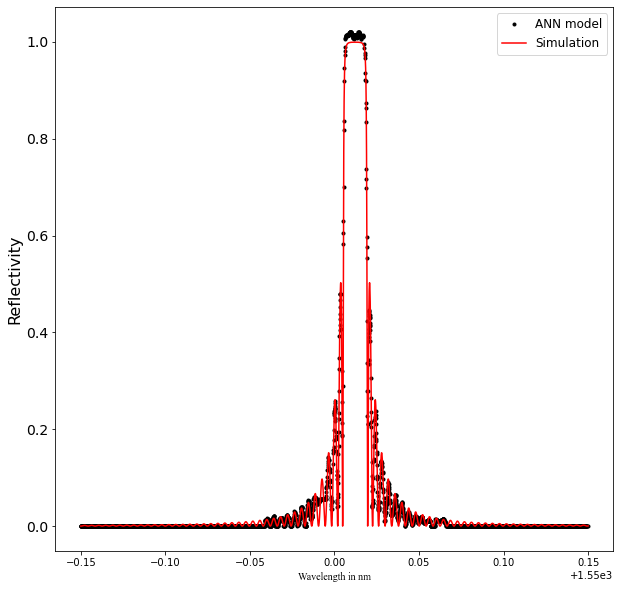

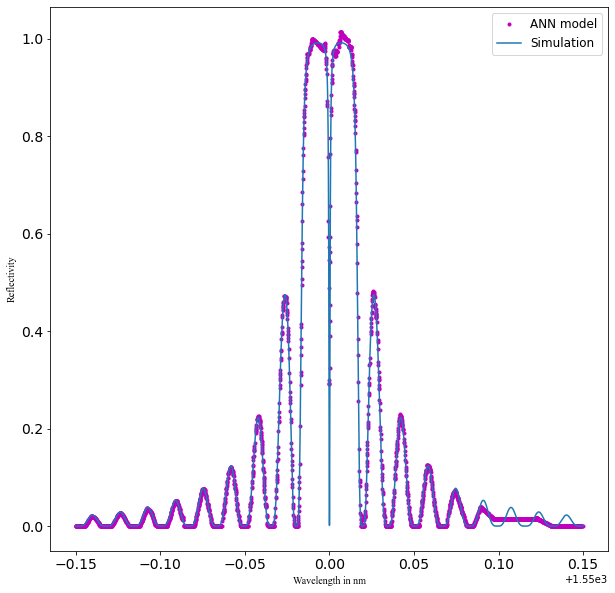

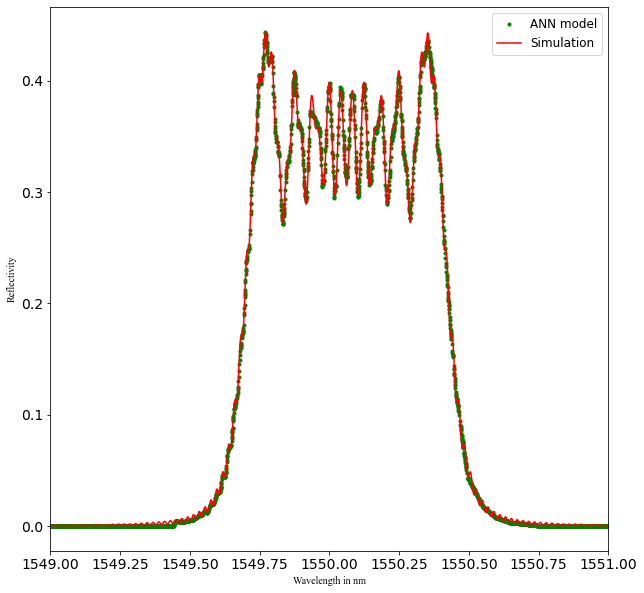

In [38]:
fig1 = plt.figure(figsize=(10, 10))
plt.plot(X_test_actual[:,0],pred[:,1],'.k')
plt.plot(datafile_2[:,0],datafile_2[:,1],'-r')
legend_properties = {'size':12}
plt.legend(['ANN model','Simulation'],prop=legend_properties)
#plt.xlim(0.1,0.8)
plt.xlabel('Wavelength in nm',fontsize=16)

#plt.xlim(1549,1551)
plt.ylabel('Reflectivity',fontsize=16)
plt.xticks(fontsize= 14)
plt.yticks(fontsize= 14)

#plt.show()
#plt.legend(loc = 'upper right')
fig1.savefig('FBG_Normal_Spectrum.jpg', dpi=600)

fig2 = plt.figure(figsize=(10, 10))
plt.plot(X_test_actual[:,0],pred[:,0],'m.')
plt.plot(datafile_1[:,0],datafile_1[:,1],'-')
legend_properties = {'size':12}
plt.legend(['ANN model','Simulation'],prop=legend_properties)
#plt.xlim(0.1,0.8)
plt.xlabel('Wavelength in nm',fontsize=16)
#plt.xlim(1549,1551)
plt.ylabel('Reflectivity',fontsize=16)
plt.xticks(fontsize= 14)
plt.yticks(fontsize= 14)

#plt.show()
#plt.legend(loc = 'upper right')
fig2.savefig('FBG_Phase_Shifted_Spectrum.jpg', dpi=600)




fig3 = plt.figure(figsize=(10, 10))
plt.plot(X_test_actual[:,1],pred[:,2],'g.')
plt.plot(datafile_3[:,0],datafile_3[:,1],'-r')
legend_properties = {'size':12}
plt.legend(['ANN model','Simulation'],prop=legend_properties)
#plt.xlim(0.1,0.8)
plt.xlabel('Wavelength in nm',fontsize=16)
plt.xlim(1549,1551)
plt.ylabel('Reflectivity',fontsize=16)
plt.xticks(fontsize= 14)
plt.yticks(fontsize= 14)

#plt.show()
#plt.legend(loc = 'upper right')
fig3.savefig('FBG_Chirped_Spectrum.jpg', dpi=600)




Visualization of training of the model:-

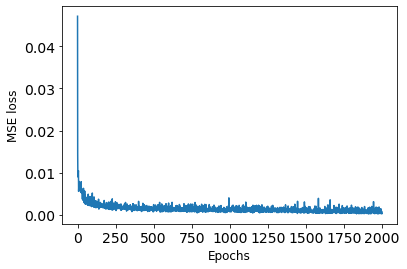

In [31]:
plt.plot(train_hist.history['MSE'])
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('MSE loss',fontsize=12)
plt.xticks(fontsize= 14)
plt.yticks(fontsize= 14)
#legend_properties = {'size':1}
#plt.legend(['Training'],prop=legend_properties)
plt.savefig('Training stage visualization.jpg', dpi=600,bbox_inches='tight')